<a href="https://colab.research.google.com/github/Shahbaz894/meachine-learning-/blob/main/Task_55_solved_by_shahbaz_feature_selection_by_wrapper_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.model_selection import cross_val_score

In [ ]:
!pip install --upgrade scikit-learn mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.7 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
df = pd.read_csv('/content/winequalityN - winequalityN.csv')
df.head(20)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [ ]:
df = df.drop('type', axis=1)

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df.isnull().sum()

fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
df = df.fillna(df.mean())

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
lr=LogisticRegression()
sel=EFS(lr,max_features=3,scoring='accuracy',cv=5)

In [ ]:
model=sel.fit(df.iloc[:,:10],df['quality'])

Streaming output truncated to the last 5000 lines.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs fai

In [ ]:
model.best_score_

0.4696011132824066

In [ ]:
model.best_feature_names_

('volatile acidity', 'citric acid', 'total sulfur dioxide')

In [ ]:
#detailed output
model.subsets_

{0: {'feature_idx': (0,),
  'cv_scores': array([0.43692308, 0.43461538, 0.43648961, 0.43648961, 0.36951501]),
  'avg_score': 0.4228065375732812,
  'feature_names': ('fixed acidity',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([0.45230769, 0.44923077, 0.44264819, 0.5334873 , 0.38953041]),
  'avg_score': 0.4534408716764375,
  'feature_names': ('volatile acidity',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([0.43461538, 0.43615385, 0.43725943, 0.43648961, 0.43648961]),
  'avg_score': 0.43620157517617103,
  'feature_names': ('citric acid',)},
 3: {'feature_idx': (3,),
  'cv_scores': array([0.43692308, 0.43615385, 0.43571978, 0.43033102, 0.43648961]),
  'avg_score': 0.4351234677562622,
  'feature_names': ('residual sugar',)},
 4: {'feature_idx': (4,),
  'cv_scores': array([0.43615385, 0.43692308, 0.43648961, 0.44572748, 0.43418014]),
  'avg_score': 0.43789483034286725,
  'feature_names': ('chlorides',)},
 5: {'feature_idx': (5,),
  'cv_scores': array([0.43692308, 0.43615385, 0.4

In [ ]:
#now we get a dictionary out put convert n into data frame
metric_df=pd.DataFrame.from_dict(model.get_metric_dict()).T
metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.4369230769230769, 0.4346153846153846, 0.436...",0.422807,"(fixed acidity,)",0.034263,0.026658,0.013329
1,"(1,)","[0.4523076923076923, 0.4492307692307692, 0.442...",0.453441,"(volatile acidity,)",0.059256,0.046103,0.023052
2,"(2,)","[0.4346153846153846, 0.43615384615384617, 0.43...",0.436202,"(citric acid,)",0.001121,0.000872,0.000436
3,"(3,)","[0.4369230769230769, 0.43615384615384617, 0.43...",0.435123,"(residual sugar,)",0.003121,0.002429,0.001214
4,"(4,)","[0.43615384615384617, 0.4369230769230769, 0.43...",0.437895,"(chlorides,)",0.005176,0.004027,0.002014
...,...,...,...,...,...,...,...
170,"(5, 8, 9)","[0.4369230769230769, 0.43615384615384617, 0.43...",0.435893,"(free sulfur dioxide, pH, sulphates)",0.001626,0.001265,0.000633
171,"(6, 7, 8)","[0.4369230769230769, 0.4376923076923077, 0.436...",0.436971,"(total sulfur dioxide, density, pH)",0.000594,0.000462,0.000231
172,"(6, 7, 9)","[0.4369230769230769, 0.43615384615384617, 0.43...",0.436817,"(total sulfur dioxide, density, sulphates)",0.00056,0.000436,0.000218
173,"(6, 8, 9)","[0.4369230769230769, 0.4369230769230769, 0.436...",0.436817,"(total sulfur dioxide, pH, sulphates)",0.000378,0.000294,0.000147


In [ ]:
df2 = pd.read_csv('/content/winequalityN - winequalityN.csv')
df2.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,:-1], df['quality'], test_size=0.2, random_state=1)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(5197, 11)
(1300, 11)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

#base line model
import numpy as np
from sklearn.metrics import r2_score
model=LinearRegression()

print("training",np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test, y_test, cv=5, scoring='r2')))

In [ ]:
import numpy as np
from sklearn.metrics import r2_score
model=LinearRegression()
print('training:', np.mean(cross_val_score(model,X_train,y_train,cv=5,scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test, y_test, cv=5, scoring='r2')))

training: 0.2808226799285272
testing 0.3079234028681697


In [ ]:
lr=LinearRegression()
exh = EFS(lr, max_features=10, scoring='r2', cv=10, print_progress=True,n_jobs=-1)

In [ ]:
sel = exh.fit(X_train, y_train)

Features: 2046/2046

In [ ]:
sel.best_score_

0.2787611501747028

In [ ]:
sel.best_feature_names_

('0', '1', '2', '3', '5', '6', '7', '8', '9', '10')

In [ ]:
metric_df = pd.DataFrame.from_dict(sel.get_metric_dict()).T
metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.007970622957797269, -0.00847310356573261, 0...",0.001769,"(0,)",0.004822,0.006493,0.002164
1,"(1,)","[0.0683566175562399, 0.02433135794319985, 0.09...",0.064295,"(1,)",0.016657,0.022427,0.007476
2,"(2,)","[0.006732334428853903, -0.003254439329615666, ...",0.002462,"(2,)",0.005588,0.007524,0.002508
3,"(3,)","[-0.0016212502747290358, -0.005386757311452328...",-0.002165,"(3,)",0.003323,0.004474,0.001491
4,"(4,)","[0.040605732463261046, 0.02096070537143857, 0....",0.034213,"(4,)",0.008386,0.011291,0.003764
...,...,...,...,...,...,...,...
2041,"(0, 1, 2, 3, 5, 6, 7, 8, 9, 10)","[0.26995610519629665, 0.3171833556116669, 0.31...",0.278761,"(0, 1, 2, 3, 5, 6, 7, 8, 9, 10)",0.02542,0.034226,0.011409
2042,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10)","[0.2657180712244124, 0.3059317385985394, 0.292...",0.271576,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10)",0.026381,0.03552,0.01184
2043,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10)","[0.2690027544546094, 0.3210106233105845, 0.308...",0.278172,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10)",0.025676,0.03457,0.011523
2044,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10)","[0.23884535811705154, 0.30028222669541915, 0.2...",0.244781,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10)",0.025659,0.034548,0.011516


In [ ]:
#now we calculate adjusted r2 score with the help of r2
def adjust_r2(r2, num_examples, num_features):
    coef = (num_examples - 1) / (num_examples - num_features - 1)
    return 1 - (1 - r2) * coef

In [ ]:
metric_df['observations'] = 404
metric_df['num_features'] = metric_df['feature_idx'].apply(lambda x:len(x))
metric_df['adjusted_r2'] = adjust_r2(metric_df['avg_score'],metric_df['observations'],metric_df['num_features'])

In [ ]:
metric_df.sort_values('adjusted_r2',ascending=False)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,observations,num_features,adjusted_r2
1370,"(1, 3, 5, 6, 9, 10)","[0.2720683983066742, 0.31103545858337567, 0.29...",0.275678,"(1, 3, 5, 6, 9, 10)",0.024835,0.033438,0.011146,404,6,0.264731
1720,"(1, 2, 3, 5, 6, 9, 10)","[0.27249583294735635, 0.30860349401303544, 0.3...",0.276432,"(1, 2, 3, 5, 6, 9, 10)",0.024998,0.033658,0.011219,404,7,0.263641
1769,"(1, 3, 5, 6, 8, 9, 10)","[0.27214081580913185, 0.31357823642301175, 0.3...",0.276207,"(1, 3, 5, 6, 8, 9, 10)",0.025677,0.034572,0.011524,404,7,0.263412
1756,"(1, 3, 4, 5, 6, 9, 10)","[0.26970749627374424, 0.31238278364636596, 0.3...",0.276204,"(1, 3, 4, 5, 6, 9, 10)",0.025059,0.03374,0.011247,404,7,0.26341
1768,"(1, 3, 5, 6, 7, 9, 10)","[0.27269608522867617, 0.31161078171988377, 0.3...",0.275821,"(1, 3, 5, 6, 7, 9, 10)",0.024774,0.033356,0.011119,404,7,0.26302
...,...,...,...,...,...,...,...,...,...,...
188,"(3, 6, 9)","[-0.002571298391454313, -0.005697828751653589,...",-0.001088,"(3, 6, 9)",0.004577,0.006162,0.002054,404,3,-0.008596
224,"(6, 8, 9)","[-0.00356187282212983, -0.007197419502136704, ...",-0.001239,"(6, 8, 9)",0.004797,0.006459,0.002153,404,3,-0.008748
193,"(3, 8, 9)","[-0.0004155670487424601, -0.005564376522636527...",-0.001486,"(3, 8, 9)",0.004112,0.005537,0.001846,404,3,-0.008997
187,"(3, 6, 8)","[-0.005727986129993479, -0.0051806275613826, 0...",-0.002083,"(3, 6, 8)",0.004451,0.005993,0.001998,404,3,-0.009598


In [ ]:
X_train_sel = sel.transform(X_train)
X_test_sel = sel.transform(X_test)

In [ ]:
model = LinearRegression()

In [ ]:
print("training",np.mean(cross_val_score(model, X_train_sel, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test_sel, y_test, cv=5, scoring='r2')))

training 0.28088601682926395
testing 0.3094522297408881


## Backward elemination

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
# load the dataset
data = pd.read_csv('/content/winequalityN - winequalityN.csv')



In [ ]:
data = data.drop('type', axis=1)

In [ ]:
data = data.fillna(data.mean())

In [ ]:
# separate the target variable
X = data.drop("quality", axis=1)
y = data['quality']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape)

(5197, 11)


In [ ]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
4152,6.2,0.20,0.25,15.0,0.055,8.0,120.0,0.99767,3.19,0.53,9.6
931,6.4,0.26,0.43,12.6,0.033,64.0,230.0,0.99740,3.08,0.38,8.9
4252,6.7,0.11,0.26,14.8,0.053,44.0,95.0,0.99676,3.20,0.35,9.8
1743,8.3,0.30,0.36,10.0,0.042,33.0,169.0,0.99820,3.23,0.51,9.3
1238,7.1,0.44,0.37,2.7,0.041,35.0,128.0,0.98960,3.07,0.43,13.5


In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
model = LinearRegression()

print("training",np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test, y_test, cv=5, scoring='r2')))

training 0.2808226799285272
testing 0.3079234028681697


In [ ]:
lr = LinearRegression()

In [ ]:
lr=LinearRegression()
sfs=SFS(lr,k_features='best',forward=True,floating=False,scoring='r2',cv=5)
sfs.fit(X_train,y_train)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 11),
                          scoring='r2')

In [ ]:
sfs.k_feature_idx_

(0, 1, 2, 3, 5, 6, 7, 8, 9, 10)

In [ ]:
metric_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T

metric_df['observations'] = 404
metric_df['num_features'] = metric_df['feature_idx'].apply(lambda x:len(x))
metric_df['adjusted_r2'] = adjust_r2(metric_df['avg_score'],metric_df['observations'],metric_df['num_features'])

metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,observations,num_features,adjusted_r2
1,"(10,)","[0.2212639623993582, 0.1958396267921999, 0.224...",0.192563,"(10,)",0.036646,0.028512,0.014256,404,1,0.190555
2,"(1, 10)","[0.2705656154297097, 0.26084948041535183, 0.28...",0.252047,"(1, 10)",0.03752,0.029192,0.014596,404,2,0.248316
3,"(1, 9, 10)","[0.28042257687003547, 0.27208147930561655, 0.2...",0.261442,"(1, 9, 10)",0.037633,0.02928,0.01464,404,3,0.255903
4,"(1, 3, 9, 10)","[0.287083375382965, 0.27651984699567556, 0.299...",0.269557,"(1, 3, 9, 10)",0.034003,0.026456,0.013228,404,4,0.262235
5,"(1, 3, 6, 9, 10)","[0.28436913204831327, 0.2825171163027673, 0.29...",0.271506,"(1, 3, 6, 9, 10)",0.032451,0.025248,0.012624,404,5,0.262354
6,"(1, 3, 5, 6, 9, 10)","[0.29426710871572026, 0.28644049568631846, 0.3...",0.2769,"(1, 3, 5, 6, 9, 10)",0.034035,0.02648,0.01324,404,6,0.265971
7,"(1, 3, 5, 6, 8, 9, 10)","[0.29563713580185624, 0.28777582887143704, 0.3...",0.277655,"(1, 3, 5, 6, 8, 9, 10)",0.034526,0.026862,0.013431,404,7,0.264886
8,"(1, 3, 5, 6, 7, 8, 9, 10)","[0.2966684047481064, 0.2886582648689112, 0.303...",0.278269,"(1, 3, 5, 6, 7, 8, 9, 10)",0.034654,0.026962,0.013481,404,8,0.263651
9,"(0, 1, 3, 5, 6, 7, 8, 9, 10)","[0.29892040574870393, 0.29032032982523825, 0.3...",0.280473,"(0, 1, 3, 5, 6, 7, 8, 9, 10)",0.034339,0.026717,0.013358,404,9,0.264037
10,"(0, 1, 2, 3, 5, 6, 7, 8, 9, 10)","[0.29635549355939994, 0.29225089355318634, 0.3...",0.280886,"(0, 1, 2, 3, 5, 6, 7, 8, 9, 10)",0.033902,0.026377,0.013189,404,10,0.262588


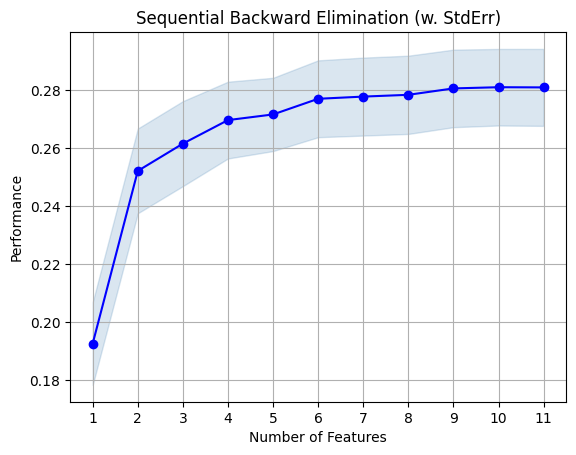

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt



fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_err',)

plt.title('Sequential Backward Elimination (w. StdErr)')
plt.grid()
plt.show()

In [ ]:
X_train_sel = sfs.transform(X_train)
X_test_sel = sfs.transform(X_test)

model = LinearRegression()

print("training",np.mean(cross_val_score(model, X_train_sel, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test_sel, y_test, cv=5, scoring='r2')))

training 0.28088601682926395
testing 0.3094522297408881


In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS


sfs2 = SFS(model,
           n_features_to_select=5,
           direction='forward',
           scoring='r2',
           n_jobs=-1,
           cv=5)

sfs2 = sfs2.fit(X_train, y_train)